In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def load_data(filename):
    # Use NumPy's loadtxt function to read data from the CSV file
    data = np.loadtxt(filename, delimiter=',')
    # Extract time, input, and measurement values
    t = data[:, 0]
    u = data[:, 1:4]
    z = data[:, 4:7]
    # Calculate the time step
    dt = t[1] - t[0]
    return t, u, z, dt

In [7]:
## Initialize Drone Parameters
mass = 0.027
Q = np.diag([0.01, 0.01, 0.01, 0.001, 0.001, 0.001])  # Process noise covariance (tune these values)
P0 = np.diag([0.1, 0.1, 0.1, 0.05, 0.05, 0.05])  # Initial covariance (tune these values)

In [25]:
def kalman_filter(t, u, z, H):
    n = len(t)
    xhat = np.zeros((n, 6))  # Estimated state vector
    P = np.zeros((n, 6, 6))  # Covariance matrix
    I = np.eye(6)
    # Initialization
    xhat[0] = np.concatenate([z[0], np.zeros(3)])
    P[0] = P0
    B = np.ones((6,3))
    F = np.eye(6)
    R = np.ones((3,3))
 
    for k in range(1, n):
        # Prediction step
        xhat_pred = F @ xhat[k-1] + B @ u[k-1]
        P_pred = F @ P[k-1] @ F.T + Q

        # Update step
        y = z[k] - H @ xhat_pred
        S = H @ P_pred @ H.T + R
        K = P_pred @ H.T @ np.linalg.inv(S)
        xhat[k] = xhat_pred + K @ y
        P[k] = (I - K @ H) @ P_pred

    return xhat, P

H = H = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]]) 
xhat, P = kalman_filter(t, u, z, H)

In [9]:
t, u, z, dt = load_data("kalman_filter_data_mocap.txt")  # Replace with the actual filename


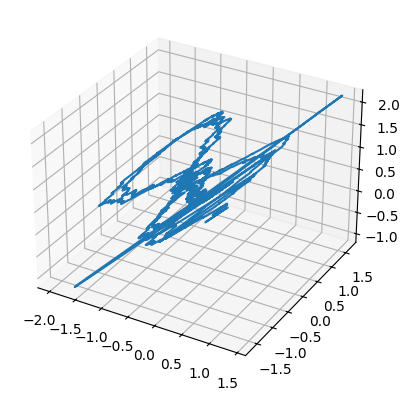

In [26]:
# Extract estimated positions from xhat
p_hat = xhat[:, :3]

# Create a 3D plot using Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(p_hat[:, 0], p_hat[:, 1], p_hat[:, 2])
plt.show()


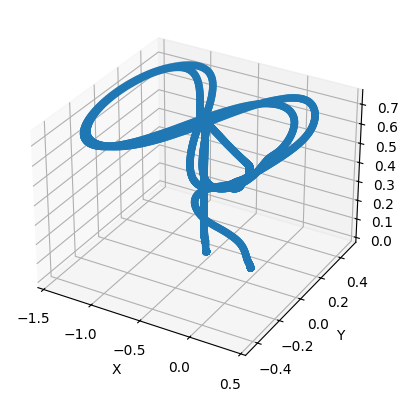

In [2]:
file_path = 'kalman_filter_data_mocap.txt'
data = pd.read_csv(file_path)

# Extract the last three columns
last_three_columns = data.iloc[:, -3:]

# Assign the columns to variables x, y, z
x = last_three_columns.iloc[:, 0]
y = last_three_columns.iloc[:, 1]
z = last_three_columns.iloc[:, 2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(x, y, z)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

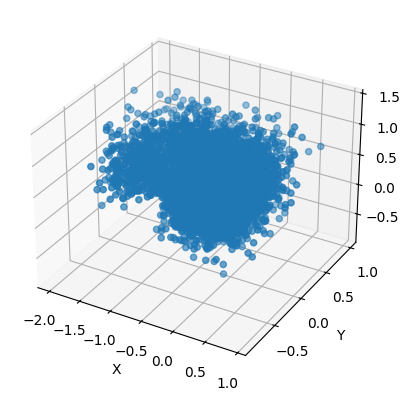

In [4]:
file_path = 'kalman_filter_data_high_noise.txt'
data = pd.read_csv(file_path)

# Extract the last three columns
last_three_columns = data.iloc[:, -3:]

# Assign the columns to variables x, y, z
x = last_three_columns.iloc[:, 0]
y = last_three_columns.iloc[:, 1]
z = last_three_columns.iloc[:, 2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(x, y, z)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()